# VaR Engines Demonstration Notebook

This notebook demonstrates the VaR calculation engines

We'll showcase:

1. Multi-methodology VaR comparison
2. Rolling VaR analysis
3. Risk metric interpretation
4. Practical portfolio applications

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Set project root path (adjust if you're deeper in the directory tree)
project_root = os.path.abspath("..")  # or two levels up if needed
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [4]:
from risk_management.value_at_risk import VaREngine, PortfolioRiskAnalyzer, create_sample_portfolio_returns

## Create a realistic portfolio with multiple characteristics


In [8]:
portfolio_returns = create_sample_portfolio_returns(n_days=1000, annual_return=0.08, annual_vol=0.15)

In [9]:
portfolio_returns

2020-01-01    0.005011
2020-01-02   -0.000488
2020-01-03   -0.001944
2020-01-04   -0.002089
2020-01-05    0.044875
                ...   
2022-09-22   -0.004364
2022-09-23    0.000543
2022-09-24    0.011350
2022-09-25   -0.007310
2022-09-26    0.001839
Freq: D, Name: Portfolio_Returns, Length: 1000, dtype: float64

In [12]:
print("📊 Creating Sample Portfolio Data...")
print("-" * 40)

print(f"Portfolio Period: {portfolio_returns.index[0].strftime('%Y-%m-%d')} to {portfolio_returns.index[-1].strftime('%Y-%m-%d')}")
print(f"Number of observations: {len(portfolio_returns)}")
print(f"Annual return: {portfolio_returns.mean() * 252:.2%}")
print(f"Annual volatility: {portfolio_returns.std() * np.sqrt(252):.2%}")
print(f"Sharpe ratio: {(portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252)):.2f}")
print()

# Display basic statistics
print("📈 Portfolio Statistics:")
print("-" * 25)
stats_df = pd.DataFrame({
    'Daily Returns': [
        f"{portfolio_returns.mean():.4f}",
        f"{portfolio_returns.std():.4f}",
        f"{portfolio_returns.skew():.4f}", 
        f"{portfolio_returns.kurtosis():.4f}",
        f"{portfolio_returns.min():.4f}",
        f"{portfolio_returns.max():.4f}"
    ]
}, index=['Mean', 'Std Dev', 'Skewness', 'Kurtosis', 'Min', 'Max'])
print(stats_df)
print()

📊 Creating Sample Portfolio Data...
----------------------------------------
Portfolio Period: 2020-01-01 to 2022-09-26
Number of observations: 1000
Annual return: 25.35%
Annual volatility: 17.08%
Sharpe ratio: 1.48

📈 Portfolio Statistics:
-------------------------
         Daily Returns
Mean            0.0010
Std Dev         0.0108
Skewness        0.1547
Kurtosis        2.0934
Min            -0.0509
Max             0.0551



## VaR Analysis - multi-method comparison

In [11]:
print("🎯 VaR Analysis - Multi-Method Comparison")
print("-" * 45)

# Initialize portfolio analyzer
risk_analyzer = PortfolioRiskAnalyzer(confidence_level=0.05)  # 95% VaR
portfolio_value = 10_000_000  # $10M portfolio

# Perform comprehensive risk analysis
var_results = risk_analyzer.analyze_portfolio_risk(portfolio_returns, portfolio_value)

print("95% VaR Results Comparison:")
print(var_results.round(4))
print()

# Highlight key insights
print("🔍 Key Insights:")
print("-" * 15)
print(f"• Historical VaR suggests daily loss could exceed ${abs(var_results.loc[0, 'VaR_Dollar']):,.0f}")
print(f"• Parametric VaR (assuming normality): ${abs(var_results.loc[1, 'VaR_Dollar']):,.0f}")
print(f"• Monte Carlo Student-t VaR: ${abs(var_results.loc[3, 'VaR_Dollar']):,.0f}")
print(f"• Expected Shortfall (worst case): ${abs(var_results.loc[0, 'ES_Dollar']):,.0f}")
print()

🎯 VaR Analysis - Multi-Method Comparison
---------------------------------------------
95% VaR Results Comparison:
                    Method   VaR_%   VaR_Dollar    ES_%    ES_Dollar  Window  \
0               Historical -1.5557 -155566.5699 -2.3885 -238848.6864   250.0   
1               Parametric -1.6989 -169886.3784 -2.1560 -215599.5212     NaN   
2     Monte Carlo (Normal) -1.6975 -169752.0013 -2.1544 -215440.9273     NaN   
3  Monte Carlo (Student-t) -1.8972 -189723.3598 -2.6975 -269748.1507     NaN   

   Volatility_%  Simulations  
0           NaN          NaN  
1         1.094          NaN  
2           NaN      10000.0  
3           NaN      10000.0  

🔍 Key Insights:
---------------
• Historical VaR suggests daily loss could exceed $155,567
• Parametric VaR (assuming normality): $169,886
• Monte Carlo Student-t VaR: $189,723
• Expected Shortfall (worst case): $238,849



## Rolling VaR analysis

In [13]:
print("📈 Rolling VaR Analysis")
print("-" * 25)

# Calculate rolling VaR using different methods
rolling_hist = risk_analyzer.rolling_var_analysis(portfolio_returns, 'historical', window=250)
rolling_param = risk_analyzer.rolling_var_analysis(portfolio_returns, 'parametric', window=250)

print(f"Rolling VaR calculated over {len(rolling_hist)} periods")
print("Recent VaR Evolution:")
print(rolling_hist.tail().round(4))
print()

📈 Rolling VaR Analysis
-------------------------
Rolling VaR calculated over 750 periods
Recent VaR Evolution:
               VaR  Expected_Shortfall      Method
Date                                              
2022-09-22 -0.0156             -0.0239  historical
2022-09-23 -0.0156             -0.0239  historical
2022-09-24 -0.0156             -0.0239  historical
2022-09-25 -0.0156             -0.0239  historical
2022-09-26 -0.0156             -0.0239  historical



## Visualization

📊 Creating Visualizations...
------------------------------


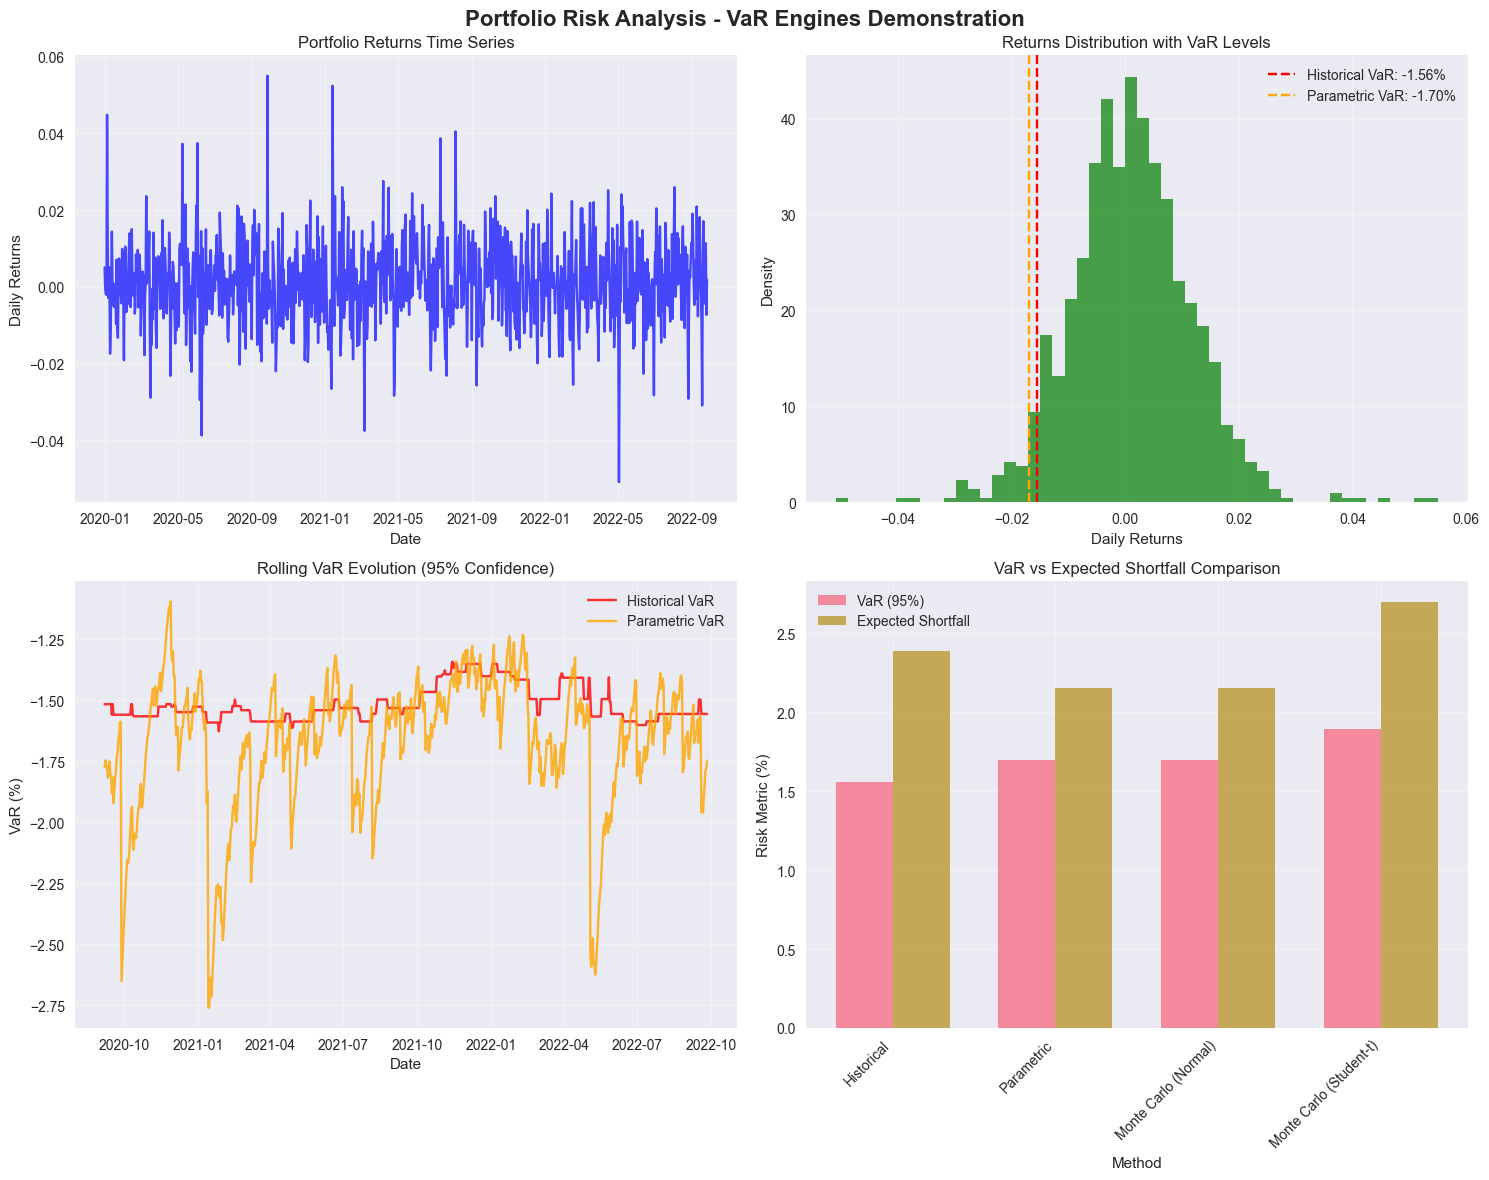

In [14]:
print("📊 Creating Visualizations...")
print("-" * 30)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Portfolio Risk Analysis - VaR Engines Demonstration', fontsize=16, fontweight='bold')

# Plot 1: Portfolio Returns Time Series
axes[0, 0].plot(portfolio_returns.index, portfolio_returns, alpha=0.7, color='blue')
axes[0, 0].set_title('Portfolio Returns Time Series')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Daily Returns')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Returns Distribution
axes[0, 1].hist(portfolio_returns, bins=50, alpha=0.7, color='green', density=True)
axes[0, 1].axvline(var_results.loc[0, 'VaR_%']/100, color='red', linestyle='--', 
                   label=f'Historical VaR: {var_results.loc[0, "VaR_%"]:.2f}%')
axes[0, 1].axvline(var_results.loc[1, 'VaR_%']/100, color='orange', linestyle='--', 
                   label=f'Parametric VaR: {var_results.loc[1, "VaR_%"]:.2f}%')
axes[0, 1].set_title('Returns Distribution with VaR Levels')
axes[0, 1].set_xlabel('Daily Returns')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Rolling VaR Comparison
axes[1, 0].plot(rolling_hist.index, rolling_hist['VaR'] * 100, 
                label='Historical VaR', color='red', alpha=0.8)
axes[1, 0].plot(rolling_param.index, rolling_param['VaR'] * 100, 
                label='Parametric VaR', color='orange', alpha=0.8)
axes[1, 0].set_title('Rolling VaR Evolution (95% Confidence)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('VaR (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: VaR Methods Comparison (Bar Chart)
methods = var_results['Method']
var_values = abs(var_results['VaR_%'])
es_values = abs(var_results['ES_%'])

x = np.arange(len(methods))
width = 0.35

bars1 = axes[1, 1].bar(x - width/2, var_values, width, label='VaR (95%)', alpha=0.8)
bars2 = axes[1, 1].bar(x + width/2, es_values, width, label='Expected Shortfall', alpha=0.8)

axes[1, 1].set_title('VaR vs Expected Shortfall Comparison')
axes[1, 1].set_xlabel('Method')
axes[1, 1].set_ylabel('Risk Metric (%)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(methods, rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Practical risk management insights

In [15]:
print("💡 Practical Risk Management Insights")
print("-" * 40)

# Calculate additional risk metrics
current_vol = portfolio_returns.std() * np.sqrt(252)
max_drawdown = (portfolio_returns.cumsum().cummax() - portfolio_returns.cumsum()).max()
var_95 = np.percentile(portfolio_returns, 5)
var_99 = np.percentile(portfolio_returns, 1)

print("Risk Management Dashboard:")
print(f"• Current Annual Volatility: {current_vol:.2%}")
print(f"• Maximum Historical Drawdown: {max_drawdown:.2%}")
print(f"• 95% Daily VaR: {var_95:.2%}")
print(f"• 99% Daily VaR: {var_99:.2%}")
print(f"• Volatility of VaR (model risk): {rolling_hist['VaR'].std():.4f}")
print()

# Model comparison insights
print("Model Comparison Insights:")
print("• Historical VaR: Based on actual experience, captures tail events")
print("• Parametric VaR: Assumes normality, may underestimate tail risk")
print("• Monte Carlo VaR: Flexible distributions, computationally intensive")
print("• Student-t VaR: Better captures fat tails in financial returns")
print()

# Risk management recommendations
print("🎯 Risk Management Recommendations:")
print("-" * 35)
print("1. Use multiple VaR methods for robust risk assessment")
print("2. Student-t Monte Carlo VaR provides better tail risk estimates")
print("3. Monitor rolling VaR for early warning of regime changes")
print("4. Expected Shortfall gives better sense of tail risk magnitude")
print("5. Validate VaR models with backtesting (traffic light approach)")
print()

💡 Practical Risk Management Insights
----------------------------------------
Risk Management Dashboard:
• Current Annual Volatility: 17.08%
• Maximum Historical Drawdown: 16.77%
• 95% Daily VaR: -1.53%
• 99% Daily VaR: -2.57%
• Volatility of VaR (model risk): 0.0007

Model Comparison Insights:
• Historical VaR: Based on actual experience, captures tail events
• Parametric VaR: Assumes normality, may underestimate tail risk
• Monte Carlo VaR: Flexible distributions, computationally intensive
• Student-t VaR: Better captures fat tails in financial returns

🎯 Risk Management Recommendations:
-----------------------------------
1. Use multiple VaR methods for robust risk assessment
2. Student-t Monte Carlo VaR provides better tail risk estimates
3. Monitor rolling VaR for early warning of regime changes
4. Expected Shortfall gives better sense of tail risk magnitude
5. Validate VaR models with backtesting (traffic light approach)



## Regime detection

In [16]:
print("🔬 Advanced Analysis - Regime Detection")
print("-" * 40)

# Simple regime detection using rolling volatility
rolling_vol = portfolio_returns.rolling(window=30).std() * np.sqrt(252)
vol_threshold = rolling_vol.quantile(0.75)

high_vol_periods = rolling_vol > vol_threshold
regime_changes = high_vol_periods.astype(int).diff().abs().sum()

print(f"Volatility Regime Analysis:")
print(f"• Average annual volatility: {rolling_vol.mean():.2%}")
print(f"• High volatility threshold: {vol_threshold:.2%}")
print(f"• Periods in high volatility regime: {high_vol_periods.sum()} days")
print(f"• Number of regime changes detected: {regime_changes}")
print()

# VaR performance during different regimes
low_vol_var = portfolio_returns[~high_vol_periods].quantile(0.05)
high_vol_var = portfolio_returns[high_vol_periods].quantile(0.05)

print("VaR by Volatility Regime:")
print(f"• Low volatility regime VaR: {low_vol_var:.2%}")
print(f"• High volatility regime VaR: {high_vol_var:.2%}")
print(f"• Regime-based VaR ratio: {abs(high_vol_var/low_vol_var):.1f}x")
print()

🔬 Advanced Analysis - Regime Detection
----------------------------------------
Volatility Regime Analysis:
• Average annual volatility: 16.72%
• High volatility threshold: 18.14%
• Periods in high volatility regime: 243 days
• Number of regime changes detected: 40.0

VaR by Volatility Regime:
• Low volatility regime VaR: -1.45%
• High volatility regime VaR: -1.92%
• Regime-based VaR ratio: 1.3x

